# SABRINA NUR AZ-ZAHRA_2109106111
## POSTTEST 7

### Mengimport Zip Dari Dataset

Dataset asli dari kaggle : https://www.kaggle.com/datasets/samuelcortinhas/muffin-vs-chihuahua-image-classification/data

Dataset yang disatukan kembali : https://drive.google.com/file/d/16zdBeD3u5v_-f3zVF0UmV7rUPG84f4XU/view?usp=sharing

In [1]:
!unzip '/content/drive/MyDrive/dataset.zip'

Streaming output truncated to the last 5000 lines.
  inflating: dataset/chihuahua/img_1_156.jpg  
  inflating: dataset/chihuahua/img_1_157.jpg  
  inflating: dataset/chihuahua/img_1_158.jpg  
  inflating: dataset/chihuahua/img_1_159.jpg  
  inflating: dataset/chihuahua/img_1_161.jpg  
  inflating: dataset/chihuahua/img_1_162.jpg  
  inflating: dataset/chihuahua/img_1_163.jpg  
  inflating: dataset/chihuahua/img_1_164.jpg  
  inflating: dataset/chihuahua/img_1_168.jpg  
  inflating: dataset/chihuahua/img_1_169.jpg  
  inflating: dataset/chihuahua/img_1_17.jpg  
  inflating: dataset/chihuahua/img_1_170.jpg  
  inflating: dataset/chihuahua/img_1_171.jpg  
  inflating: dataset/chihuahua/img_1_173.jpg  
  inflating: dataset/chihuahua/img_1_174.jpg  
  inflating: dataset/chihuahua/img_1_176.jpg  
  inflating: dataset/chihuahua/img_1_177.jpg  
  inflating: dataset/chihuahua/img_1_178.jpg  
  inflating: dataset/chihuahua/img_1_179.jpg  
  inflating: dataset/chihuahua/img_1_181.jpg  
  inflatin

### Mendownload dan import library splitfolders untuk membagi folder

In [2]:
!pip install split-folders

In [3]:
import splitfolders

In [4]:
splitfolders.ratio("dataset",
                   output="dataset_final",
                   seed = 1337,
                   ratio=(.8,.1,.1))

Copying files: 5917 files [00:02, 2636.05 files/s]


Dataset dibagi menjadi 3 folder dengan rasio 80% train, 10% val, dan 10% test

### Membuat ImageDataGenerator

ImageDataGenerator digunakan untuk memproses gambar agar dapat lebih mudah di prediksi oleh model

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(
    rescale = 1./255
)

In [7]:
train_generator  = train_datagen.flow_from_directory(
    '/content/dataset_final/train',
    target_size = (64,64),
    batch_size = 32,
    class_mode = 'binary'
)

val_generator  = val_datagen.flow_from_directory(
    '/content/dataset_final/val',
    target_size = (64,64),
    batch_size = 32,
    class_mode = 'binary'
)

Found 4733 images belonging to 2 classes.
Found 590 images belonging to 2 classes.


### Membuat model CNN

In [8]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [9]:
model = Sequential([
    # 1. feature extraction layer
    Conv2D(32,(3,3), activation = 'relu', input_shape = (64,64,3)),
    MaxPooling2D(2,2),
    Conv2D(32,(3,3), activation = 'relu'),
    MaxPooling2D(2,2),
    # 2. fully connected layer
    Flatten(),
    Dense(128, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

Menggunakan output layer sigmoid karena hanya ada 2 class dan loss binary_crossentropy karena hanya ada 2 class

### Melatih model dan membuat fitur callback

In [10]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

Fitur callback digunakan untuk mencegah adanya overfitting dan underfitting dari model

In [11]:
history = model.fit(train_generator, epochs = 50,
          validation_data = val_generator,
          verbose = 1, callbacks=[early_stopping])

Epoch 1/50
148/148 [==============================] - 41s 197ms/step - loss: 0.5127 - accuracy: 0.7399 - val_loss: 0.4193 - val_accuracy: 0.8136
Epoch 2/50
148/148 [==============================] - 29s 197ms/step - loss: 0.3894 - accuracy: 0.8339 - val_loss: 0.3485 - val_accuracy: 0.8627
Epoch 3/50
148/148 [==============================] - 29s 198ms/step - loss: 0.3564 - accuracy: 0.8468 - val_loss: 0.3027 - val_accuracy: 0.8763
Epoch 4/50
148/148 [==============================] - 32s 219ms/step - loss: 0.3282 - accuracy: 0.8625 - val_loss: 0.2988 - val_accuracy: 0.8729
Epoch 5/50
148/148 [==============================] - 32s 216ms/step - loss: 0.2921 - accuracy: 0.8785 - val_loss: 0.2609 - val_accuracy: 0.8898
Epoch 6/50
148/148 [==============================] - 30s 200ms/step - loss: 0.2752 - accuracy: 0.8876 - val_loss: 0.2426 - val_accuracy: 0.9000
Epoch 7/50
148/148 [==============================] - 30s 203ms/step - loss: 0.2632 - accuracy: 0.8893 - val_loss: 0.3170 - val_ac

In [13]:
test_datagen  = ImageDataGenerator(
    rescale = 1./255
)

test_generator = test_datagen.flow_from_directory(
    '/content/dataset_final/test',
    target_size = (64,64),
    batch_size = 32,
    class_mode = 'binary'
)

Found 594 images belonging to 2 classes.


### Melakukan evaluasi model untuk mengecek nilai loss dan akurasi

In [14]:
model.evaluate(test_generator)

19/19 [==============================] - 3s 141ms/step - loss: 0.4282 - accuracy: 0.8266


[0.4282047152519226, 0.8265992999076843]

### Membuat hasil plot

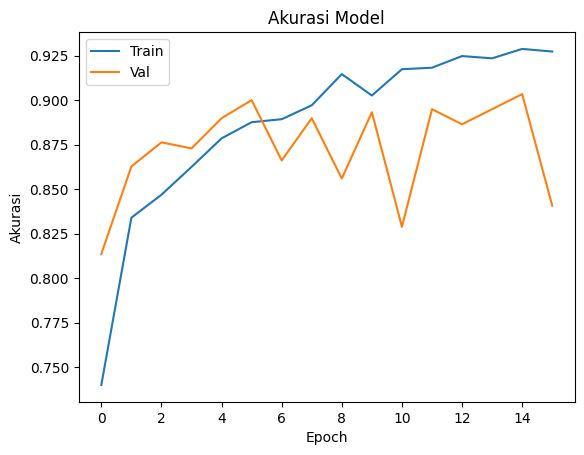

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('Akurasi')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

Dapat dilihat dari plot di atas pada train menunjukkan arah yang bagus karena terus naik sedangkan kurang baik pada val

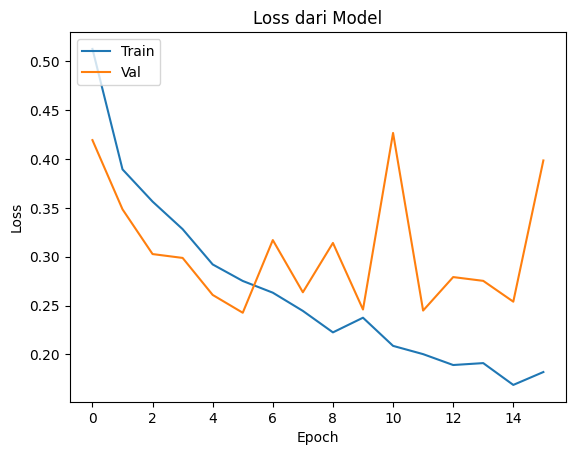

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss dari Model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

Dari plot di atas dapat dilihat nilai loss dari train terus turun dengan berjalannya epoch sedangkan pada val menunjukkan arah yang kurang konsisten